# Importing Dependencies

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import cv2
import os

Non - Covid

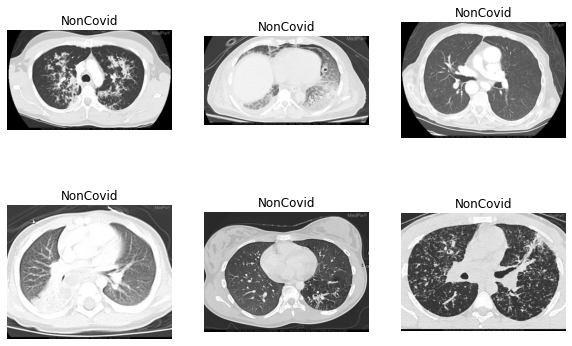

In [ ]:
from os import listdir
listdir()
NCovid_train='/content/drive/MyDrive/covid/train/noncovid'
train_images_NC=listdir(NCovid_train)
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join(NCovid_train,train_images_NC[i])),cmap='gray')
    plt.title('NonCovid')
    plt.axis('off')
plt.show()

Covid

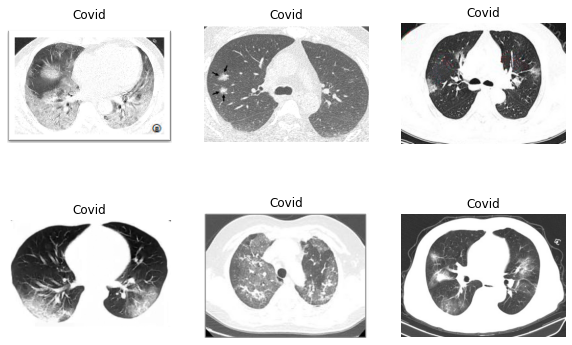

In [ ]:
from os import listdir
listdir()
NCovid_train='/content/drive/MyDrive/covid/train/covid'
train_images_NC=listdir(NCovid_train)
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join(NCovid_train,train_images_NC[i])),cmap='gray')
    plt.title('Covid')
    plt.axis('off')
plt.show()

In [ ]:
total_train_covid = len(os.listdir('/content/drive/MyDrive/covid/train/covid'))
total_train_noncovid = len(os.listdir('/content/drive/MyDrive/covid/train/noncovid'))
total_test_covid = len(os.listdir('/content/drive/MyDrive/covid/test/covid'))
total_test_noncovid = len(os.listdir('/content/drive/MyDrive/covid/test/noncovid'))

print("Train sets images COVID: {}".format(total_train_covid))
print("Train sets images Non COVID: {}".format(total_train_noncovid))
print("Test sets images COVID: {}".format(total_test_covid))
print("Test sets images Non COVID: {}".format(total_test_noncovid))

Train sets images COVID: 261
Train sets images Non COVID: 298
Test sets images COVID: 88
Test sets images Non COVID: 99


# Image Pre-Processing

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                    validation_split=0.2,
                                    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_path='/content/drive/MyDrive/covid/train'
test_path = '/content/drive/MyDrive/covid/test'

train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(299 , 299),
        batch_size=32,
        shuffle=True,
        class_mode = "categorical",
        classes= ['noncovid','covid'])

test_set = test_datagen.flow_from_directory(
       
        test_path,
        target_size=(299 , 299),
        batch_size=32,
        shuffle=True,
        class_mode = "categorical",
        classes= ['noncovid','covid'] )

Found 559 images belonging to 2 classes.
Found 187 images belonging to 2 classes.


In [ ]:
class_map = train_set.class_indices
class_map

{'covid': 1, 'noncovid': 0}

# Model Building

# CNN

In [ ]:
from keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
model = Sequential()

model.add(layers.Conv2D(64,(3,3),activation='relu',strides=2 ,input_shape=(200,200,3)))
model.add(layers.Conv2D(128,(3,3),activation='relu',strides=2))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(32,(3,3),activation='relu',strides=1))
model.add(layers.Conv2D(64,(3,3),activation='relu',strides=1))
model.add(layers.MaxPooling2D())

model.add(layers.Dropout(0.4))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2,'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        36896     
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

history= model.fit(train_set,epochs=5,validation_data=test_set)

Epoch 1/5
18/18 [==============================] - 5s 264ms/step - loss: 0.0959 - accuracy: 0.9696 - val_loss: 1.7415 - val_accuracy: 0.6845
Epoch 2/5
18/18 [==============================] - 4s 246ms/step - loss: 0.0636 - accuracy: 0.9821 - val_loss: 2.1133 - val_accuracy: 0.6203
Epoch 3/5
18/18 [==============================] - 4s 250ms/step - loss: 0.0583 - accuracy: 0.9839 - val_loss: 2.6572 - val_accuracy: 0.6203
Epoch 4/5
18/18 [==============================] - 4s 247ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 1.9308 - val_accuracy: 0.6684
Epoch 5/5
18/18 [==============================] - 4s 249ms/step - loss: 0.0515 - accuracy: 0.9857 - val_loss: 2.7105 - val_accuracy: 0.6150


# Plot

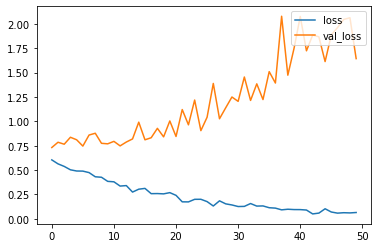

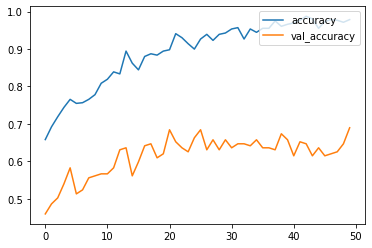

In [ ]:

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

# Evaluation

In [ ]:
model.evaluate(test_set)
model.evaluate(train_set)

18/18 [==============================] - 3s 183ms/step - loss: 0.1175 - accuracy: 0.9606


[0.11745862662792206, 0.960644006729126]

# VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Model

In [ ]:
vgg = VGG16(input_shape= [200,200,3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
x = Flatten()(vgg.output)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(4096, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
vgg =model.fit(
  train_set,
  epochs=50,
  validation_data=test_set,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/50
18/18 [==============================] - 12s 509ms/step - loss: 17.3852 - accuracy: 0.5116 - val_loss: 0.7676 - val_accuracy: 0.5294
Epoch 2/50
18/18 [==============================] - 5s 286ms/step - loss: 0.6842 - accuracy: 0.5975 - val_loss: 0.7410 - val_accuracy: 0.4759
Epoch 3/50
18/18 [==============================] - 6s 327ms/step - loss: 0.5391 - accuracy: 0.7013 - val_loss: 0.7160 - val_accuracy: 0.6096
Epoch 4/50
18/18 [==============================] - 5s 288ms/step - loss: 0.4200 - accuracy: 0.8140 - val_loss: 0.6991 - val_accuracy: 0.6096
Epoch 5/50
18/18 [==============================] - 6s 323ms/step - loss: 0.3742 - accuracy: 0.8426 - val_loss: 0.8053 - val_accuracy: 0.6203
Epoch 6/50
18/18 [==============================] - 5s 287ms/step - loss: 0.3162 - accuracy: 0.8658 - val_loss: 0.7792 - val_accuracy: 0.6096
Epoch 7/50
18/18 [==============================] - 5s 299ms/step - loss: 0.2521 - accuracy: 0.8927 - val_loss: 1.0087 - val_accuracy: 0.6738
Epoc

## **Evaluate**

In [ ]:
model.evaluate(test_set)

6/6 [==============================] - 1s 172ms/step - loss: 1.3233 - accuracy: 0.6631


[1.3233340978622437, 0.6631016135215759]

In [ ]:
test_set.class_indices

{'covid': 1, 'noncovid': 0}

## **Plot**

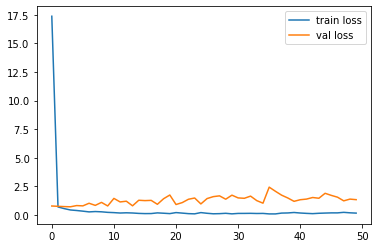

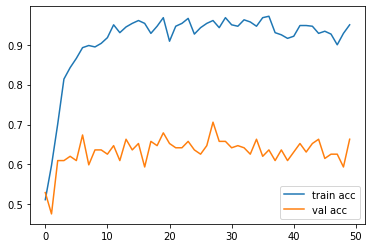

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(vgg.history['loss'], label='train loss')
plt.plot(vgg.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(vgg.history['accuracy'], label='train acc')
plt.plot(vgg.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## **Inception V3**

In [ ]:
in3 = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet',input_shape = (299,299,3))


In [ ]:
for i in in3.layers:
  i.trainable = False

In [ ]:
in3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_192 (Conv2D)            (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 149, 149, 32  96         ['conv2d_192[0][0]']             
 Normalization)                 )                                                      

In [ ]:
x = Flatten()(in3.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=in3.input, outputs=prediction)

# view the structure of the model
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_192 (Conv2D)            (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 149, 149, 32  96         ['conv2d_192[0][0]']             
 Normalization)                 )                                                           

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
inceptionv3 =model.fit(
  train_set,
  epochs=45,
  validation_data=test_set,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/45
18/18 [==============================] - 6s 335ms/step - loss: 0.4872 - accuracy: 0.8283 - val_loss: 1.1501 - val_accuracy: 0.5348
Epoch 2/45
18/18 [==============================] - 7s 380ms/step - loss: 0.4911 - accuracy: 0.8086 - val_loss: 0.7168 - val_accuracy: 0.6364
Epoch 3/45
18/18 [==============================] - 6s 324ms/step - loss: 0.3543 - accuracy: 0.8658 - val_loss: 0.8183 - val_accuracy: 0.6096
Epoch 4/45
18/18 [==============================] - 6s 326ms/step - loss: 0.3467 - accuracy: 0.8533 - val_loss: 0.8325 - val_accuracy: 0.5829
Epoch 5/45
18/18 [==============================] - 6s 326ms/step - loss: 0.2427 - accuracy: 0.8873 - val_loss: 0.8307 - val_accuracy: 0.6150
Epoch 6/45
18/18 [==============================] - 6s 340ms/step - loss: 0.2726 - accuracy: 0.8712 - val_loss: 0.8746 - val_accuracy: 0.6310
Epoch 7/45
18/18 [==============================] - 6s 323ms/step - loss: 0.2799 - accuracy: 0.8909 - val_loss: 0.8223 - val_accuracy: 0.6203
Epoch 

# Plot

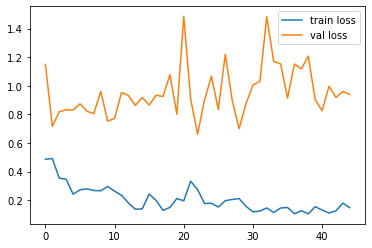

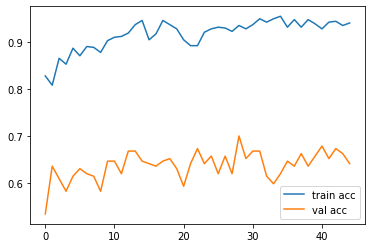

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(inceptionv3.history['loss'], label='train loss')
plt.plot(inceptionv3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(inceptionv3.history['accuracy'], label='train acc')
plt.plot(inceptionv3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Inception V2

In [ ]:
in2 = tf.keras.applications.InceptionResNetV2(include_top=False,weights='imagenet',input_shape = (299,299,3))

In [ ]:
for i in in2.layers:
  i.trainable = False

In [ ]:
in2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_286 (Conv2D)            (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 149, 149, 32  96         ['conv2d_286[0][0]']             
 Normalization)                 )                                               

In [ ]:
x = Flatten()(in2.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=in2.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# view the structure of the model
model.summary()

In [ ]:
histroy =model.fit(
  train_set,
  epochs=45,
  validation_data=test_set,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/45
18/18 [==============================] - 25s 826ms/step - loss: 27.7171 - accuracy: 0.5259 - val_loss: 13.1835 - val_accuracy: 0.4599
Epoch 2/45
18/18 [==============================] - 9s 501ms/step - loss: 9.9879 - accuracy: 0.6369 - val_loss: 4.4220 - val_accuracy: 0.5455
Epoch 3/45
18/18 [==============================] - 9s 515ms/step - loss: 5.7492 - accuracy: 0.6530 - val_loss: 2.2164 - val_accuracy: 0.5615
Epoch 4/45
18/18 [==============================] - 9s 486ms/step - loss: 2.3603 - accuracy: 0.7281 - val_loss: 1.1615 - val_accuracy: 0.5775
Epoch 5/45
18/18 [==============================] - 9s 479ms/step - loss: 1.2851 - accuracy: 0.7782 - val_loss: 1.6109 - val_accuracy: 0.5882
Epoch 6/45
18/18 [==============================] - 9s 481ms/step - loss: 0.9209 - accuracy: 0.7996 - val_loss: 1.1057 - val_accuracy: 0.5615
Epoch 7/45
18/18 [==============================] - 9s 485ms/step - loss: 0.6426 - accuracy: 0.8175 - val_loss: 1.0021 - val_accuracy: 0.5936
Epo

# Plot

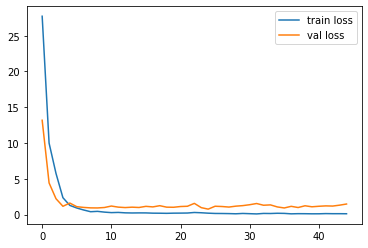

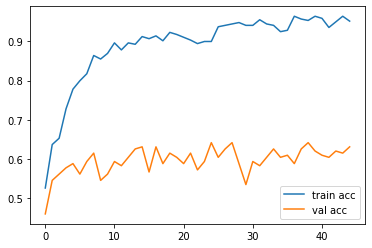

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(histroy.history['loss'], label='train loss')
plt.plot(histroy.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(histroy.history['accuracy'], label='train acc')
plt.plot(histroy.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')